## Introduction to Inferential Statistics

While descriptive statistics summarize the characteristics of a d set, inferential statistics help you come to conclusions and make predictions based on your data.


When you have collected data from a sample, you can use inferential statistics to understand the larger population from which the sample is taken.

![](https://datatab.net/assets/tutorial/Descriptive_statistics_and_inferential_statistics.png)

Inferential statistics have two main uses:
1. Making estimates about populations (for example, the mean SAT score of all 11th graders in the US).
2. Testing hypotheses to draw conclusions about populations (for example the relationship between SAT scores and family income).

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("data/train.csv.xls")

In [3]:
df.shape

(1460, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**Basic Probability**

- Let's start with a simple example: Say, we flip a fair coin
- Intuitively, there's a 50% chance of getting heads, and a 50% chance of getting tails. This is because there are only two possible outcomes, and each event is equally likely.
- Therefore, we can say that the Probability of getting a Heads is 0.5. Similarly, Probability of getting a Tails is 0.5
- Probability can roughly be described as **the chance of an event or sequence of events occurring**


- **Experiment** - are the uncertain situations which could have multiple outcomes. A coin toss is an experiment
- **Outcome** is the result of a single trial. So, if head lands, the outcome of or coin toss experiment is "Heads" 
- **Event** is one or more outcomes from an experiment. "Tails" is one of the possible events for this experiment.

**Rules**
- The Probability that an event occurs with certainty is 1
- The Probability that an event will not occur surely is 0
- The Probability of the complement of an event is 1 minus the probability of that event.
- The probability of at least 1 of 2 (or more) things that can not simultaneously occur (mutually exclusive) is the sum of their respective probabilities
- **Mutually exclusive is a statistical term describing two or more events that cannot occur simultaneously. For example, it is impossible to roll a five and a three on a single die at the same time.**

For any 2 events A & B the probability that at least one occurs is the sum of their individual probabilities minus the probability of their intersection. i.e.

<center>
  <i><b>P(A ∪ B) = P(A) + P(B) - P(A ∩ B)</b></i>
</center>


**Example**

The National Sleep Foundation reports that around 3% of the American population has sleep-breathing issues. They also report that around 10% of the American population has restless leg syndrome. Does this imply that 13% of people will have at least one of these problems?

Answer: No, the events can occur simultaneously and so are not mutually exclusive. To elaborate:

- **Let's check out the Probability of picking a house in the Neighborhood - "OldTown"**

No, of house in OldTown no. of house Let's go through this in Python

In [5]:
# Let's check the different neighborhood
df['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [6]:
# Total number of houses in the neighborhood
all_houses = len(df)
print("Total Number of Houses in the Neighborhood:",all_houses)

Total Number of Houses in the Neighborhood: 1460


In [7]:
# Total number of houses in the Old town neighborhood
houses_in_OldTown = len(df[df['Neighborhood']== 'OldTown'])
print("Total Number of Houses in the Old Town Road:",houses_in_OldTown)

Total Number of Houses in the Old Town Road: 113


In [8]:
# Find the probability of picking a House in the Old Town
probability = (houses_in_OldTown/all_houses)*100
print("Probility of picking a house in OldTown: {0:.2f}".format(probability)+'%')

Probility of picking a house in OldTown: 7.74%


## Conditional Probability

- There are 10 candies in a bag: 5 green, and 5 blue.
- What is the probability of getting 3 blue candies in a row?
- The probability of getting the first blue candy is 5/10 or 1/2.

When we pick a blue candy, though, we remove it from the bag. We're left with 9 candies in total with (5-1 =)4 Blue ones. So the probability of getting another blue is 4/9. Similarly, the probability of picking a third blue candy is 3/8

Since we're calculating the probability of picking 1 Blue Candy AND 1 Blue Candy AND 1 Blue Candy

- Our final probability is **1/2 * 4/9 * 3/8, or .0833**. So, there is an 8.3% chance of picking three blue candies in a row. Simple tricks: Whenever you have to verbally say AND (like we just did above), you will want to MULTIPLY the probabilities whenever you have to verbally say OR, you will want to ADD the probabilities

**GIVEN that we have the probability of picking a house in "Old Town" neighborhood, we go a step further and AGAIN pick a house from the SAME neighborhood?**

In [9]:
# Enter conditional probability code
cond_prob = (houses_in_OldTown/all_houses)* ((houses_in_OldTown-1)/(all_houses-1))
print("The probability of Picking a house in Old Town and again picking a house from the same neighborhood is {:.9f}".format(cond_prob*100))

The probability of Picking a house in Old Town and again picking a house from the same neighborhood is 0.594139352


## Conditional Probability

- Let take an example, that we throw a dice of containing six faces.
- So, there are Total no. of Combinations = 6*6 = 36

Let's see how:

2 {{1,1}} => 1/36

3 {{1,2}, {2,1}} => 2/36

4 {{2,2}, {3,1}, {1,3}} => 3/36

5 {{1,4}, {4,1}, {2,3}, {3,2}} => 4/36

6 {{3,3}, {1,5}, {5,1}, {2,4}, {4,2}} => 5/36

7 {{1,6}, {6,1}, {2,5}, {5,2}, {3,4}, {4,3}} => 6/36

8 {{2,6}, {6,2}, {3,5}, {5,3}, {4,4}} => 5/36

9 {{3,6}, {6,3}, {5,4}, {4,5}} => 4/36

10 {4,6}, {6,4}, {5,5}} => 3/36

11 {{5,6}, {6,5}} => 2/36

12 {{6,6}} => 1/36

## PDF and IMF

- The probability distribution for a discrete randomanable is the **probability mass function** for that variable and similarly and if our random variable takes continuous values the distribution is called a **probability density function**.
- In the previous what we plotted was the Probability Mass Function of a Discrete Random Variable (X which is the sum of two fair dies)
- One of the most common Probability Distribution Functions is the Normal Distribution

## Normal Distribution

- Normal distribution, also known as the Gaussian distribution, is a probability distribution that is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean. In graph form normal distribution will appear as a bell curve.

## Checking for Skewness of the data

- We Generally check Askewness in the Target Columns of the data.
- Skewness is a state of distribution where the distribution is highly biased towards the right or left side of the plot.

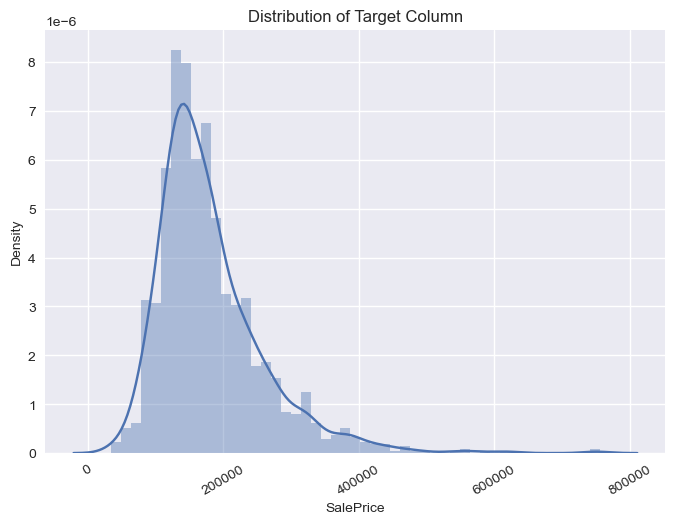

In [10]:
plt.rcParams['figure.figsize'] = (11, 4)
plt.style.use('seaborn')

plt.xticks(rotation=30)
sns.distplot(df['SalePrice'])
plt.title('Distribution of Target Column')
plt.show()

- The distribution for our target variable aka SalePrice does'nt resemble a normal distribution, it is skewed to the right
- If we remove the outlier, it'd somewhat resemble a Normal Distribution.

In [11]:
# Computing the skewness for each feature
df['SalePrice'].skew()

1.8828757597682129

## Z-Score

- The number of standard deviations from the mean is also called the "Standard Score", "Sigma" or "Z-Score"

![](https://image.slidesharecdn.com/lecbio5-120420150958-phpapp02/85/lec-bio-5-13-320.jpg?cb=1669275232)

- Let's take an example to better understand the meaning of z-score
    - Let's Suppose the average height of a Student in a class is 1.4 meters
     - In that same class one of the students is 1.85m tall
     - You can see on the bell curve that 1.85m is 3 standard deviations from the mean of 14.
     - so, the student with 1.85m height **has a z-score" of 3.0.**

### Inference

### Sample Mean and population Mean
- Let's consider a sample of 500 houses at random from 1460 houses and plot it's mean
- But the mean of these 500 houses can be near or pretty far away from the mean of the 1460 houses calculated earlier.

In [12]:
# lets take seed so that everytime the random values come out to be constant
np.random.seed(100)
# Lets take 500 sample values from the dataset of 1460 values 
sample_ages = np.random.choice(a=df['SalePrice'], size=300)

# getting the sample mean
print ("Sample mean: ", sample_ages.mean())
print ("Sample median: ", np.median(sample_ages))
print ("Sample std: ", np.std(sample_ages))

# getting the population mean
print("Population mean: ", df['SalePrice'].mean())
print("Population median: ", df['SalePrice'].median())
print("Population std: ", df['SalePrice'].std())

Sample mean:  180879.64333333334
Sample median:  158950.0
Sample std:  83886.28589244762
Population mean:  180921.19589041095
Population median:  163000.0
Population std:  79442.50288288663


> From above information we can infer that the sample mean, median, and std are not far from the population, hence...

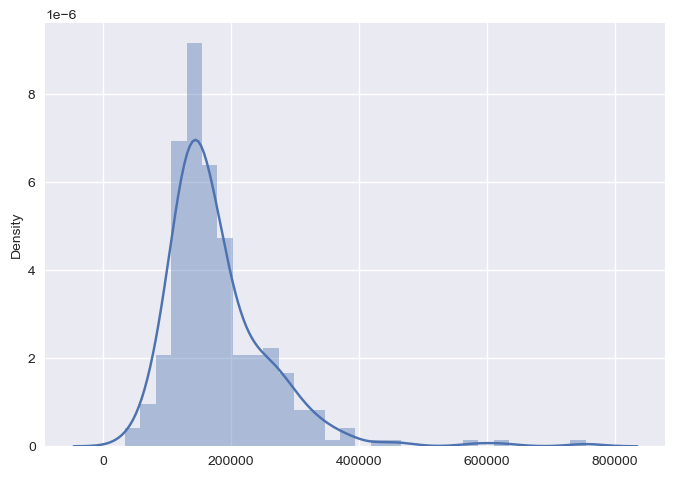

In [13]:
sns.distplot(sample_ages)
plt.show()

## Confidence Interval

![](https://analystprep.com/cfa-level-1-exam/wp-content/uploads/2019/10/page-159.jpg)

**Confidence Interval (CI)** is a type of estimate computed from the statistics of the observed data. This proposes a range of plausible values for an unknown parameter (for example, the mean). The interval has an associated confidence level that the true parameter is in the proposed range.

The 95% confidence interval defines a range of values that you can be 95% certain contains the population mean. With large samples, you know that mean with much more precision than you do with a small sample, so the confidence interval is quite narrow when computed from a large sample.

In [14]:
# import the scipy packages
import scipy.stats as stats
import math

# lets seed the random values
np.random.seed(10)

# lets take a sample size
sample_size = 1000
sample = np.random.choice(a= df['SalePrice'], size = sample_size)
sample_mean = sample.mean()

In [15]:
# get the z-critical value
z_critical = stats.norm.ppf(q = 0.95)

# check the z-critical value
print("z-critical value: ", z_critical)

z-critical value:  1.6448536269514722


In [16]:
# Get the population standard deviation
pop_stdev = df['SalePrice'].std()

# Checking the margin of error
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

# Defining our cofidence interval
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean - margin_of_error,)

In [17]:
pop_stdev, margin_of_error

(79442.50288288663, 4132.188980333281)

In [18]:
# Print the result
print("Confidence interval: ",end=" ")
print(confidence_interval)
print("True mean: {}".format(df['SalePrice'].mean()))

Confidence interval:  (178338.05201966673, 178338.05201966673)
True mean: 180921.19589041095


### References

1. https://datatab.net/tutorial/descriptive-inferential-statistics
2. https://www.scribbr.com/statistics/inferential-statistics/
3. https://www.questionpro.com/blog/inferential-statistics/
4. https://www.geeksforgeeks.org/style-plots-using-matplotlib/

### Hypothesis Testing

- Statistical Hypothesis, sometimes called confirmatory data analysis, is a hypothesis that is testable on the basis of observing a process that is modeled via a set of random variables. A statistical hypothesis test is a method of statistical inference.

### Null Hypothesis
- In inferential Statistics. **The Null Hypothesis is a general statement or default position that there is no relationship between two measured phenomena or no association among groups.**
- Statistical hypothesis tests are based on a statement called the null hypothesis that assumes nothing interesting is going on between whatever variables you are testing.
- Therefore, in our case the Null Hypothesis would be: **The Mean of House Prices in Old Town is not different from the houses of other neighborhoods**

### Alternate Hypothesis
- The alternate hypothesis is just an alternative to the null. For example, if your null is **I'm going to win up to 1000** then your alternate is **I'm going to win more than 1000**. Basically, you're looking at whether there's enough change (with the alternate hypothesis) to be able to reject the null hypothesis

### The Null Hypothesis is assumed to be true and Statistical evidence is required to reject it in favor of an Alternative Hypothesis.

1. Once you have the null and alternative hypothesis in hand, you choose a significance level (often denoted by the Greek letter a). The significance level is a probability threshold that determines when you reject the null hypothesis.

2. After carrying out a test, if the probability of getting a result as extreme as the one you observe due to chance is lower than the significance level, you reject the null hypothesis in favor of the alternative.

3. This probability of seeing a result as extreme or more extreme than the one observed is known as the p-value.

### P Value
- In statistical hypothesis testing **the p-value or probability value** is the probability of obtaining test results at least as extreme as the results actually observed during the test, assuming that the null hypothesis is correct
- So now say that we have put a significance (a)=0.05
- This means that if we see a p-value of lesser than 0.05, we reject our Null and accept the Alternative to be true


**Hypothesis: Are house prices in Old Town really different from the House Prices of Other Neighborhoods?**

In [19]:
# lets import z test from stats models
from statsmodels.stats.weightstats import ztest

In [20]:
z_statistic, p_value = ztest(x1 = df[df['Neighborhood'] == 'OldTown']['SalePrice'],
                            value = df['SalePrice'].mean())

print("Z-Statistics is: {}".format(z_statistic))
print("P-Value is: {:.50f}".format(p_value))

Z-Statistics is: -10.639294263334575
P-Value is: 0.00000000000000000000000001956052602626001826532572


In [21]:
# Hypothesis result
if p_value > 0.05:
    print("No Rejected")
else:
    print("No Accepted")

No Accepted


- If the P value if less than 0.05 then we can reject our null hypothesis against the alternate hypothesis.

- **The Probability of getting the given distribution of houseprices in OldTown under the assumption that its mean, is the same as the mean of all house prices.**

### Another way to test: Gossel's (Student's) t-test

- The T-test is a statistical test used to determined whether a numeric data sample differs significantly from the population or whether two sample differ from one another.
- A z-test assumes a sample size > 30 to work, but what if our sample is less than 30?
- A-test solves this problem and gives us a way to do a hypothesis test on a smaller sample.
- Now, let's also see if house proces in Stone Brook neighborhood are different from the houses in the rest of the neighborhoods.

**Now, let's also see if house prices in Stone Brook neighborhood are different from the houses in the rest of the neighborhoods.**

In [22]:
print("No of houses in Stone Brook: {}"\
      .format(df['Neighborhood'].value_counts()['StoneBr']))

No of houses in Stone Brook: 25


In [23]:
# getting stat values and pvalues
stats, p_val = stats.ttest_1samp(a = df[df['Neighborhood'] == 'StoneBr']['SalePrice'],
                                 popmean = df['SalePrice'].mean())

In [24]:
print("t_stat:", stats,"p_val:",p_val)

t_stat: 5.735070151700397 p_val: 6.558704101036394e-06


In [25]:
# Hypothesis result
if p_value > 0.05:
    print("No Rejected")
else:
    print("No Accepted")

No Accepted


The p-value in this case again is low and we can reject our null hypoythesis

### Chi-Squared Goodness of fit Test

The term "chi-squared test," also written as χ2 test, refers to certain types of statistical hypothesis tests that are valid to perform when the test statistic is chi-squared distributed under the null hypothesis. Often, however, the term is used to refer to Pearson's chi-squared test and variants thereof.

**A chi-squared goodness of fit tests whether the distribution of sample categorical data matches an expected distribution.**

For example,
- You could use a chi-squared goodness-of-fit test to check whether the race demographics of members at your church or school match that of the entire population of your country. 
- You could check whether the computer browser preferences of your friends match those of Internet uses as a whole.
- When working with categorical data the values the observations themselves aren't of much use for statistical testing because categories like "male" "female" and "other" have no mathematical meaning

**Let's generate some fake demographic data for U.S. and Minnesota and walk through the chi-square goodness of fit test to check whether they are different**

In [26]:
# Generate data
national = pd.DataFrame(["white"]*100000 + ["hispanic"]*6000+\
                        ["black"]*50000 + ["asian"]*15000 + ["other"]*35000)
minnesota = pd.DataFrame(["white"]*600 + ["hispanic"]*300+\
                        ["black"]*250 + ["asian"]*75 + ["other"]*150)

In [27]:
# Generate table
national_table = pd.crosstab(index=national[0], columns="count")
minnesota_table = pd.crosstab(index=minnesota[0], columns="count")

In [28]:
print("National")
print(national_table)
print("minnesota")
print(minnesota_table)

National
col_0      count
0               
asian      15000
black      50000
hispanic    6000
other      35000
white     100000
minnesota
col_0     count
0              
asian        75
black       250
hispanic    300
other       150
white       600


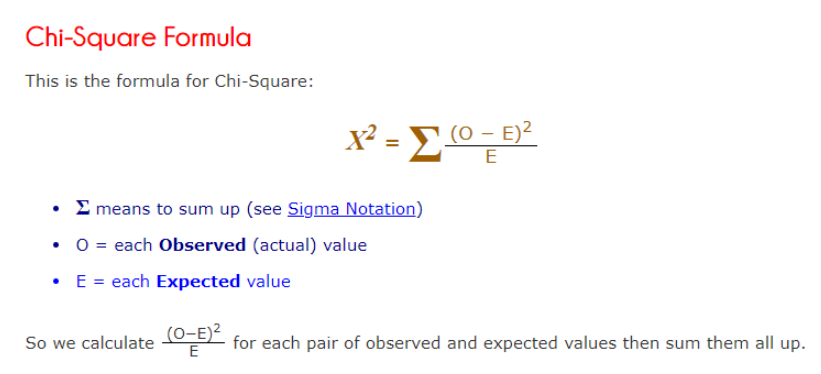

- **Good Fit**: If the significance value that is p-value associated with chi-square statistics is 0.002, there is very strong evidence of rejecting the null hypothesis of no fit. It means good fit.

In [40]:
# calculate ch2
observed = minnesota_table
national_ratios = national_table/len(national)  # Get population ratios
expected = national_ratios * len(minnesota)   # Get expected counts
chi_squared_stat = (((observed-expected)**2)/expected).sum()

print("Chi-Squared:", chi_squared_stat[0])

Chi-Squared: 1751.3844155844156


In [41]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable


### Effect of LandContour on SalePrice

In [31]:
# Let's test if knowing LandContour which is the overall flatness of the property tells us anything about the price

# For this let's divide the SalePrice in three buckets - High, Medium, Low

import scipy.stats as sp
def compute_freq_chi2(x,y):
    freqtab = pd.crosstab(x,y)
    print("Frequency table")
    print("============================")
    print(freqtab)
    print("============================")
    chi2, pval, dof, expected = sp.chi2_contingency(freqtab)
    print("ChiSquare test statistic: ",chi2)
    print("p-value: ",pval)
    return


price = pd.qcut(df['SalePrice'], 3, labels = ['High', 'Medium', 'Low'])
compute_freq_chi2(df.LandContour, price)

Frequency table
SalePrice    High  Medium  Low
LandContour                   
Bnk            32      20   11
HLS            10      12   28
Low             8      11   17
Lvl           437     447  427
ChiSquare test statistic:  26.252544346201447
p-value:  0.00019976918050008285


- The low p-value tells us that the two variables aren't independent and knowing the LandContour of a house does tells us something about its SalePrice.

**The frequency distribution reflects this**

- Houses that are Near Flat/Level(Lvl) have an equal distribution of SalePrice.
- On the other hand houses that are at a Hillside i.e., Significant slope from side to side (HLS) have almost thrice as much houses with low price than high prices.

In [32]:
# !pip install statsmodels
# !pip install pylab

In [33]:
# use qplot
import statsmodels.api as sm
import pylab

In [34]:
# create function to plot the quantile
def create_qqplot(data,title):
    sm.qqplot(data, line = '45')
    plt.title(title)
    pylab.show()

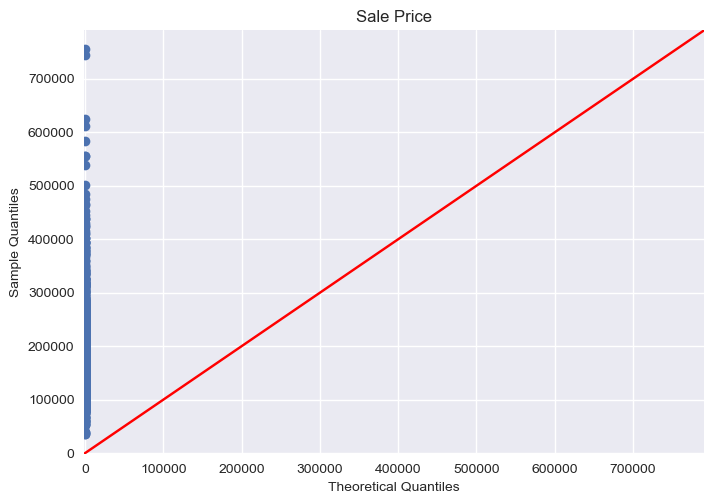

In [35]:
# create qq plot
create_qqplot(df["SalePrice"], 'Sale Price')

In [36]:
# Use the Normality Test
from scipy.stats import shapiro, normaltest, anderson

In [37]:
# function to test normality
def try_normal(data):
    result = {'Anderson' : {i:j for i,j in zip(anderson(data)[2], anderson(data)[1])},
              'Shapiro': shapiro(data)[1],
              'K^2': normaltest(data)[1]}
    result['Anderson']['stat'] = anderson(data)[0]
    return result

In [38]:
# check using anderson
try_normal(df['SalePrice'])

{'Anderson': {15.0: 0.574,
  10.0: 0.654,
  5.0: 0.785,
  2.5: 0.916,
  1.0: 1.089,
  'stat': 41.69199630641583},
 'Shapiro': 3.2072044604461286e-33,
 'K^2': 2.283848353787728e-133}

**Anderson is stat < critical value for accepting H0 (fall to reject H0) then data is normal distributed (or the designed dist)**

**Anderson is stat > critical value for rejecting H0 (Accept H1) then data is not normal distributed (or the designed dist)**